# **1. Perkenalan Dataset**


*Eva Meivina Dwiana_mc009d5x0328*




Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [76]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [77]:
bank_data_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/proyekbelajarpemula/refs/heads/main/bank_data.csv")
bank_data_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [78]:
print("Dimensi data (jumlah baris & kolom):", bank_data_df.shape)
bank_data_df.info()

Dimensi data (jumlah baris & kolom): (2512, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 

In [79]:
jumlah_duplikat = bank_data_df.duplicated().sum()
print("Jumlah baris duplikat:", jumlah_duplikat)

Jumlah baris duplikat: 0


In [80]:
bank_data_df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [81]:
bank_data_df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


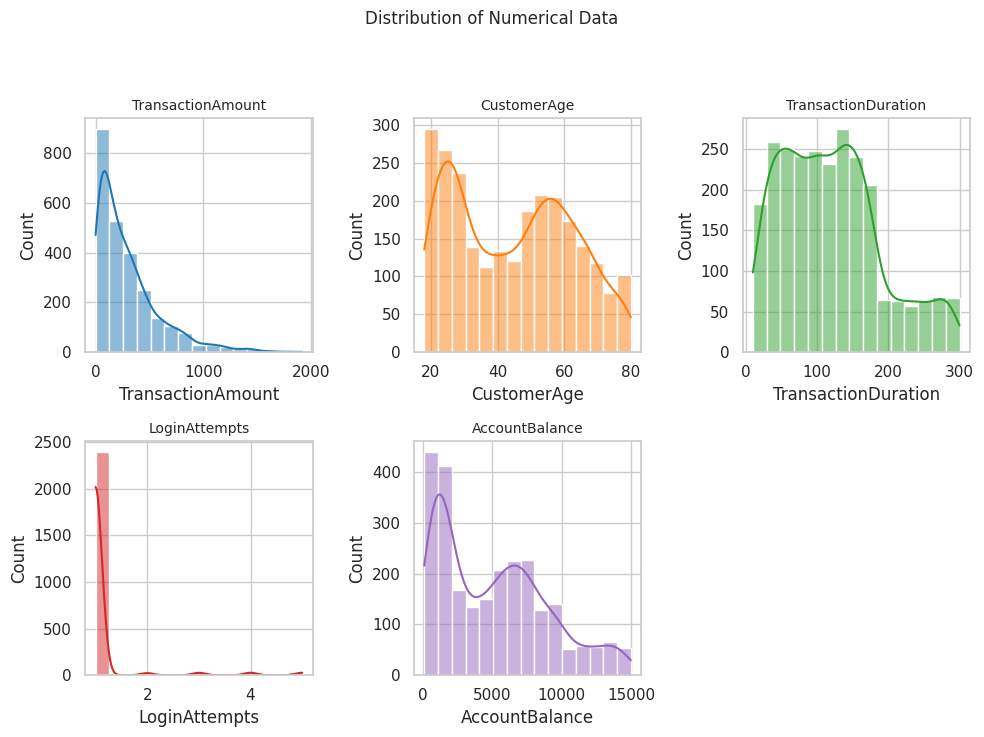

In [82]:
fitur_angka = bank_data_df.select_dtypes('number').columns

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 7))
for idx, kolom in enumerate(fitur_angka):
    plt.subplot(2, 3, idx + 1)
    sns.histplot(bank_data_df[kolom], bins=15, kde=True, color=color[idx % len(color)])
    plt.title(f"{kolom}", fontsize=10)

plt.suptitle("Distribution of Numerical Data", fontsize=12, y=1.05)
plt.tight_layout()
plt.show()

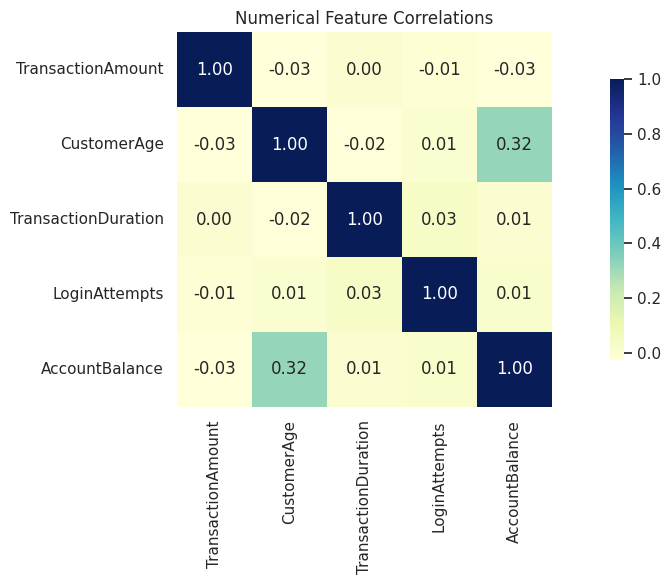

In [83]:
num_cols_only = bank_data_df.select_dtypes('number')

corr_result = num_cols_only.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 6))
heat = sns.heatmap(
    corr_result,
    ax=ax,
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    square=True,
    cbar_kws={"shrink": .75}
)
ax.set_title("Numerical Feature Correlations", fontsize=12)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [84]:
df_proc = bank_data_df.copy()

In [85]:
columns_to_exclude = {
    'TransactionID', 'AccountID', 'TransactionDate', 'Location',
    'DeviceID', 'IP Address', 'MerchantID', 'Channel',
    'PreviousTransactionDate', 'TransactionDuration', 'TransactionType'
}
existing_cols = list(set(columns_to_exclude).intersection(bank_data_df.columns))
cleaned_df = bank_data_df.drop(existing_cols, axis=1)

# Encoding
if 'CustomerOccupation' in cleaned_df.columns:
    occ_vals = cleaned_df['CustomerOccupation']
    if len(occ_vals.unique()) > 5:
        encoded_vals = occ_vals.map(occ_vals.value_counts())
        cleaned_df['CustomerOccupation'] = encoded_vals
    else:
        encoded_df = pd.get_dummies(cleaned_df['CustomerOccupation'], prefix='Occ')
        cleaned_df = pd.concat([cleaned_df.drop(columns='CustomerOccupation'), encoded_df], axis=1)

for num_col in cleaned_df.select_dtypes(include='number'):
    stats = cleaned_df[num_col].describe()
    iqr_range = stats['75%'] - stats['25%']
    out_low = stats['25%'] - 1.5 * iqr_range
    out_high = stats['75%'] + 1.5 * iqr_range
    cleaned_df[num_col] = cleaned_df[num_col].apply(lambda x: out_low if x < out_low else (out_high if x > out_high else x))

cleaned_df.head(10)

,TransactionAmount,CustomerAge,LoginAttempts,AccountBalance,Occ_Doctor,Occ_Engineer,Occ_Retired,Occ_Student
0,14.09,70,1.0,5112.21,True,False,False,False
1,376.24,68,1.0,13758.91,True,False,False,False
2,126.29,19,1.0,1122.35,False,False,False,True
3,184.50,26,1.0,8569.06,False,False,False,True
4,13.45,26,1.0,7429.40,False,False,False,True
5,92.15,18,1.0,781.68,False,False,False,True
6,7.08,37,1.0,13316.71,True,False,False,False
7,171.42,67,1.0,2796.24,False,False,True,False
8,106.23,51,1.0,9095.14,False,True,False,False
9,815.96,55,1.0,1021.88,True,False,False,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

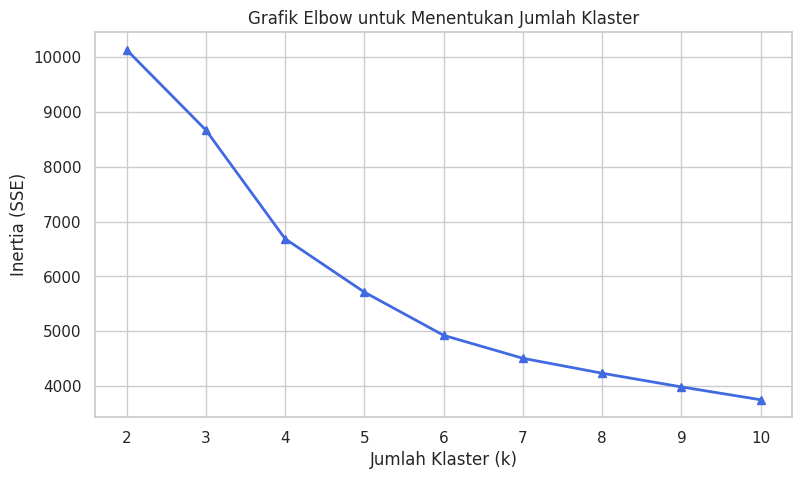

In [86]:
sse_scores = []
jumlah_cluster_dicoba = range(2, 11)

numerical_features = bank_data_df.select_dtypes(include=np.number).columns
bank_data_num = bank_data_df[numerical_features]

scaler = StandardScaler()
bank_data_df_scaled = scaler.fit_transform(bank_data_num)

for jumlah in jumlah_cluster_dicoba:
    kmeans = KMeans(n_clusters=jumlah, random_state=42, n_init=10)
    kmeans.fit(bank_data_df_scaled)
    sse_scores.append(kmeans.inertia_)

plt.figure(figsize=(9, 5))
plt.plot(jumlah_cluster_dicoba, sse_scores, color='royalblue', marker='^', linewidth=2)
plt.title("Grafik Elbow untuk Menentukan Jumlah Klaster")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [87]:
skor_silhouette = {}
for jumlah_k in range(2, 11):
    model_kmeans = KMeans(n_clusters=jumlah_k, random_state=42, n_init=10)

    numerical_features = bank_data_df.select_dtypes(include=np.number).columns
    bank_data_num = bank_data_df[numerical_features]

    label_cluster = model_kmeans.fit_predict(bank_data_num)
    skor = silhouette_score(bank_data_num, label_cluster)
    skor_silhouette[jumlah_k] = skor
    print(f"Skor Silhouette untuk {jumlah_k} klaster: {skor:.4f}")

optimal_klaster = max(skor_silhouette, key=skor_silhouette.get)
print(f"Jumlah klaster terbaik: {optimal_klaster}")

model_final = KMeans(n_clusters=optimal_klaster, random_state=42, n_init=10)
bank_data_df['Cluster'] = model_final.fit_predict(bank_data_num)

Skor Silhouette untuk 2 klaster: 0.6181
Skor Silhouette untuk 3 klaster: 0.6236
Skor Silhouette untuk 4 klaster: 0.5968
Skor Silhouette untuk 5 klaster: 0.5712
Skor Silhouette untuk 6 klaster: 0.5338
Skor Silhouette untuk 7 klaster: 0.4796
Skor Silhouette untuk 8 klaster: 0.4741
Skor Silhouette untuk 9 klaster: 0.4585
Skor Silhouette untuk 10 klaster: 0.4453
Jumlah klaster terbaik: 3


In [88]:
bank_data_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,2
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,0


## **c. Feature Selection (Opsional)**

In [89]:
numerical_columns = ['TransactionAmount', 'CustomerAge']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(bank_data_df[numerical_columns])

selector = VarianceThreshold(threshold=0.01)
df_selected = selector.fit_transform(df_scaled)

print(f"Jumlah fitur sebelum seleksi: {df_scaled.shape[1]}")
print(f"Jumlah fitur setelah seleksi: {df_selected.shape[1]}")

Jumlah fitur sebelum seleksi: 2
Jumlah fitur setelah seleksi: 2


In [90]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [91]:
silhouette_vals = {}

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(bank_data_num)

    score = silhouette_score(bank_data_num, labels)
    silhouette_vals[k] = score
    print(f"Silhouette Score untuk {k} cluster: {score:.4f}")

optimal_k_pca = max(silhouette_pca, key=silhouette_pca.get)
print(f"Jumlah cluster optimal setelah Feature Selection: {optimal_k_pca}")

df_scaled = pd.DataFrame(df_scaled, columns=numerical_columns, index=bank_data_df.index)

final_model_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled['Cluster_PCA'] = final_model_pca.fit_predict(df_pca)

Silhouette Score untuk 2 cluster: 0.6181
Silhouette Score untuk 3 cluster: 0.6236
Silhouette Score untuk 4 cluster: 0.5968
Silhouette Score untuk 5 cluster: 0.5712
Silhouette Score untuk 6 cluster: 0.5338
Silhouette Score untuk 7 cluster: 0.4796
Silhouette Score untuk 8 cluster: 0.4741
Silhouette Score untuk 9 cluster: 0.4585
Silhouette Score untuk 10 cluster: 0.4453
Jumlah cluster optimal setelah Feature Selection: 3


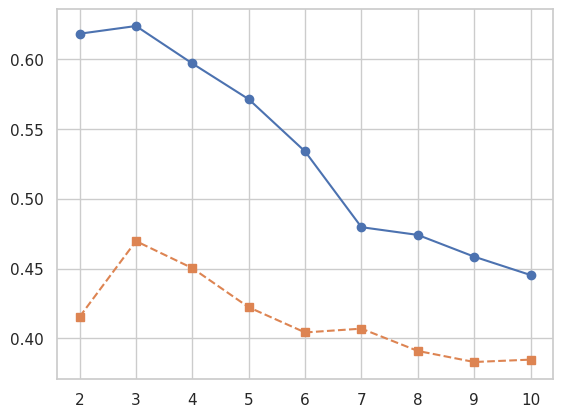

In [92]:
plt.plot(silhouette_vals.keys(), silhouette_vals.values(), marker='o', label="Sebelum Feature Selection")
plt.plot(silhouette_pca.keys(), silhouette_pca.values(), marker='s', linestyle='dashed', label="Sesudah Feature Selection")

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

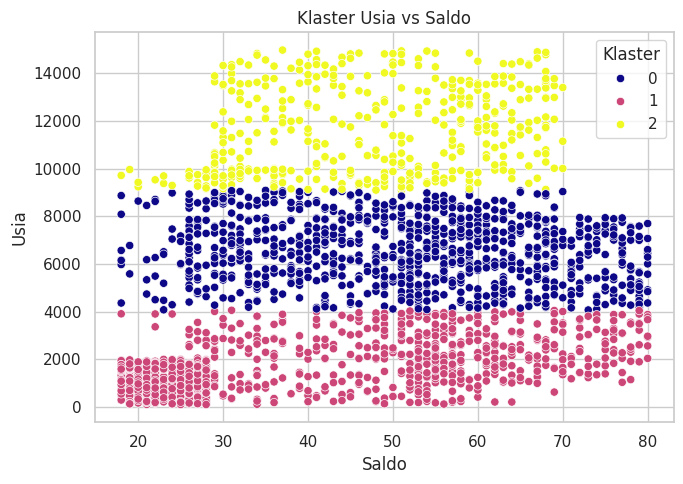

In [93]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=bank_data_df,
    x='CustomerAge',
    y='AccountBalance',
    hue='Cluster',
    palette='plasma'
)

plt.title('Klaster Usia vs Saldo')
plt.xlabel('Saldo')
plt.ylabel('Usia')
plt.legend(title='Klaster')
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [94]:
encoded_columns = [col for col in bank_data_df.columns if col.startswith('CustomerOccupation_')]

if encoded_columns:
    bank_data_df['CustomerOccupation_Original'] = bank_data_df[encoded_columns].idxmax(axis=1).str.extract(r'CustomerOccupation_(.+)')

    bank_data_df.drop(columns=encoded_columns, inplace=True)

    bank_data_df.rename(columns={'CustomerOccupation_Original': 'CustomerOccupation'}, inplace=True)

selected_columns = ['TransactionAmount', 'CustomerAge', 'CustomerOccupation', 'LoginAttempts', 'AccountBalance', 'Cluster']
bank_data_df[selected_columns].head()

,TransactionAmount,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,Cluster
0,14.09,70,Doctor,1,5112.21,0
1,376.24,68,Doctor,1,13758.91,2
2,126.29,19,Student,1,1122.35,1
3,184.50,26,Student,1,8569.06,0
4,13.45,26,Student,1,7429.40,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [95]:
# Saya tidak menerapkan metode normalisasi atau standardisasi pada dataset ini

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [96]:
# Menampilkan statistik deskriptif per cluster
clusters = bank_data_df['Cluster'].unique()

for c in sorted(clusters):
    data_per_cluster = bank_data_df[bank_data_df['Cluster'] == c]
    print(f"\n>>> Karakteristik Cluster {c}")
    summary = data_per_cluster[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']].describe()
    print(summary)


>>> Karakteristik Cluster 0
       TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
count         944.000000   944.000000           944.000000      944.000000
mean          280.395233    51.648305           118.411017     6546.390011
std           263.881658    15.776717            69.627752     1324.870324
min             0.320000    18.000000            10.000000     4069.170000
25%            80.382500    39.000000            63.000000     5473.372500
50%           211.140000    53.000000           112.000000     6509.660000
75%           388.845000    64.000000           161.000000     7567.500000
max          1607.550000    80.000000           299.000000     9088.360000

>>> Karakteristik Cluster 1
       TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
count        1151.000000  1151.000000          1151.000000     1151.000000
mean          308.620973    37.911381           119.463944     1582.399531
std           307.713891    18.326957     

#### Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans :

**Cluster 0**
* **Rata-rata Jumlah Transaksi ($):** 280.40

* **Rata-rata Usia Pelanggan (tahun):** 51.65

* **Rata-rata Durasi Transaksi (detik):** 118.41

* **Rata-rata Saldo Akun ($)**: 6,546.39

* **Analisis:**
Cluster ini berisi pelanggan dengan usia yang lebih matang, saldo rekening yang stabil, dan nilai transaksi yang cenderung sedang. Mereka tampaknya lebih berhati-hati dalam mengelola keuangan dan tidak terburu-buru dalam bertransaksi. Fokus mereka lebih pada menjaga kestabilan finansial, sehingga penawaran produk seperti tabungan jangka panjang, deposito, atau investasi dengan risiko rendah akan sangat cocok untuk mereka.

**Cluster 1**
* **Rata-rata Jumlah Transaksi ($):** 308.62

* **Rata-rata Usia Pelanggan (tahun):** 37.91

* **Rata-rata Durasi Transaksi (detik):** 119.46

* **Rata-rata Saldo Akun ($):** 1,582.40

* **Analisis:**
Pelanggan dalam kelompok ini umumnya lebih muda dan aktif bertransaksi, meskipun saldo rekening mereka masih tergolong rendah. Hal ini bisa menunjukkan bahwa mereka berada dalam fase awal atau pertengahan karier, dengan kecenderungan konsumsi yang tinggi. Kelompok ini punya potensi pertumbuhan yang besar, sehingga program loyalitas, cashback, atau cicilan ringan bisa menjadi strategi yang menarik untuk meningkatkan daya beli mereka.

**Cluster 2**
* **Rata-rata Jumlah Transaksi ($):** 306.09

* **Rata-rata Usia Pelanggan (tahun):** 47.55

* **Rata-rata Durasi Transaksi (detik):** 122.93

* **Rata-rata Saldo Akun ($):** 11,621.09

* **Analisis:**
Cluster ini terdiri dari pelanggan dengan daya beli tertinggi, ditandai oleh saldo akun yang besar serta aktivitas transaksi yang tinggi. Mereka berada di usia produktif dan cenderung memiliki kestabilan finansial yang baik. Karakteristik ini menjadikan sasaran ideal untuk produk-produk keuangan eksklusif seperti layanan prioritas, investasi bernilai tinggi, atau paket keuangan khusus kelas premium.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [97]:
bank_data_df.to_csv("dataset_inisiasi.csv", index=False)
print("Hasil clustering telah berhasil disimpan dalam file dataset_inisiasi.csv")

Hasil clustering telah berhasil disimpan dalam file dataset_inisiasi.csv
